In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sed_scores_eval import collar_based, package_dir, io
from time import time

In [2]:
test_data_dir = package_dir / 'tests' / 'data'
if not test_data_dir.exists():
    io.download_test_data()

In [3]:
collar = .2
offset_collar_rate = .2
time_decimals = 30

# Tune thresholds on validation set using sed_scores_eval package

In [4]:
tic = time()
f_curves = collar_based.fscore_curve(
    scores=test_data_dir / "validation" / "scores",
    ground_truth=test_data_dir / "validation" / "ground_truth.tsv",
    onset_collar=collar, offset_collar=collar,
    offset_collar_rate=offset_collar_rate,
    time_decimals=time_decimals,
)
time() - tic

1.7522850036621094

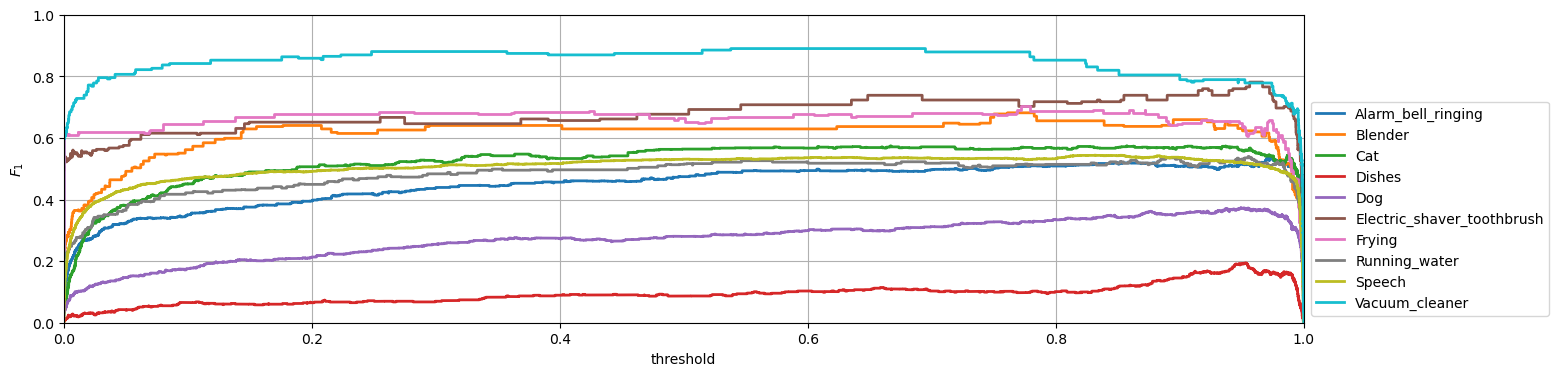

In [5]:
plt.figure(figsize=(16,4))
plt.ylim(.0,1.0)
plt.xlim(0.,1.)
plt.grid()
plt.ylabel('$F_1$')
plt.xlabel('threshold')
events = []
for event_class in f_curves:
    f_curve, p_curve, r_curve, scores_curve, stats_curve = f_curves[event_class]
    plt.step(scores_curve, f_curve, lw=2, where='pre')
    events.append(event_class)
plt.legend(events, loc='lower left', bbox_to_anchor=(1, .0));

In [6]:
tic = time()
f_best, p_best, r_best, thresholds_best, stats_best = collar_based.best_fscore(
    scores=test_data_dir / "validation" / "scores",
    ground_truth=test_data_dir / "validation" / "ground_truth.tsv",
    onset_collar=collar, offset_collar=collar,
    offset_collar_rate=offset_collar_rate,
    time_decimals=time_decimals,
)
time() - tic

1.7341179847717285

In [7]:
thresholds_best

{'Alarm_bell_ringing': 0.9712919294834137,
 'Blender': 0.7718322575092316,
 'Cat': 0.8573147654533386,
 'Dishes': 0.953504204750061,
 'Dog': 0.9495177268981934,
 'Electric_shaver_toothbrush': 0.9615568220615387,
 'Frying': 0.7752213776111603,
 'Running_water': 0.9555087685585022,
 'Speech': 0.8313961625099182,
 'Vacuum_cleaner': 0.6164107918739319}

In [8]:
for event_class in f_best:
    print(event_class)
    print(' ', 'f:', f_best[event_class])
    print(' ', 'p:', p_best[event_class])
    print(' ', 'r:', r_best[event_class])

Alarm_bell_ringing
  f: 0.5352862849533956
  p: 0.6072507552870091
  r: 0.4785714285714286
Blender
  f: 0.6815642458100559
  p: 0.7176470588235294
  r: 0.648936170212766
Cat
  f: 0.574568288854003
  p: 0.6182432432432432
  r: 0.5366568914956011
Dishes
  f: 0.1941031941031941
  p: 0.30980392156862746
  r: 0.1413237924865832
Dog
  f: 0.37393767705382436
  p: 0.4049079754601227
  r: 0.3473684210526316
Electric_shaver_toothbrush
  f: 0.7812500000000001
  p: 0.7936507936507936
  r: 0.7692307692307693
Frying
  f: 0.7027027027027027
  p: 0.7142857142857143
  r: 0.6914893617021277
Running_water
  f: 0.539906103286385
  p: 0.6084656084656085
  r: 0.48523206751054854
Speech
  f: 0.5439330543933054
  p: 0.6236162361623616
  r: 0.4823059360730594
Vacuum_cleaner
  f: 0.8901098901098902
  p: 0.9
  r: 0.8804347826086957
macro_average
  f: 0.5817361441266756
  p: 0.629787130694701
  r: 0.546154962094421
micro_average
  f: 0.5029459025174076
  p: 0.5789149198520345
  r: 0.4446022727272727


# Verify validation results using sed_eval package

In [9]:
tic = time()
collar_based_metrics = collar_based.reference.metrics(
    scores=test_data_dir / "validation" / "scores",
    ground_truth=test_data_dir / "validation" / "ground_truth.tsv",
    threshold=thresholds_best,
    collar=collar, offset_collar_rate=offset_collar_rate,
)
print(time() - tic)
print(collar_based_metrics)

4.624780893325806
Event based metrics (onset-offset)
  Evaluated length                  : 10459.12 sec
  Evaluated files                   : 1163 
  Evaluate onset                    : True 
  Evaluate offset                   : True 
  T collar                          : 200.00 ms
  Offset (length)                   : 20.00 %

  Overall metrics (micro-average)
  F-measure
    F-measure (F1)                  : 50.29 %
    Precision                       : 57.89 %
    Recall                          : 44.46 %
  Error rate
    Error rate (ER)                 : 0.87 
    Substitution rate               : 0.01 
    Deletion rate                   : 0.55 
    Insertion rate                  : 0.32 

  Class-wise average metrics (macro-average)
  F-measure
    F-measure (F1)                  : 58.17 %
    Precision                       : 62.98 %
    Recall                          : 54.62 %
  Error rate
    Error rate (ER)                 : 0.74 
    Deletion rate                   : 0.45 

# Apply thresholds to eval set

In [10]:
tic = time()
f, p, r, stats = collar_based.fscore(
    scores=test_data_dir / "eval" / "scores",
    ground_truth=test_data_dir / "eval" / "ground_truth.tsv",
    threshold=thresholds_best,
    onset_collar=collar, offset_collar=collar,
    offset_collar_rate=offset_collar_rate,
    time_decimals=time_decimals,
)
time() - tic

1.0728867053985596

In [11]:
for event_class in f:
    print(event_class)
    print(' ', 'f:', f[event_class])
    print(' ', 'p:', p[event_class])
    print(' ', 'r:', r[event_class])

Alarm_bell_ringing
  f: 0.40978593272171254
  p: 0.5114503816793893
  r: 0.34183673469387754
Blender
  f: 0.6329113924050633
  p: 0.6756756756756757
  r: 0.5952380952380952
Cat
  f: 0.7787234042553192
  p: 0.7956521739130434
  r: 0.7625
Dishes
  f: 0.2020497803806735
  p: 0.35384615384615387
  r: 0.1413934426229508
Dog
  f: 0.49318801089918257
  p: 0.6177474402730375
  r: 0.41043083900226757
Electric_shaver_toothbrush
  f: 0.5806451612903226
  p: 0.6923076923076923
  r: 0.5
Frying
  f: 0.6741573033707865
  p: 0.6818181818181818
  r: 0.6666666666666666
Running_water
  f: 0.4632768361581921
  p: 0.6029411764705882
  r: 0.3761467889908257
Speech
  f: 0.6043613707165109
  p: 0.7008670520231214
  r: 0.5312157721796276
Vacuum_cleaner
  f: 0.8045977011494253
  p: 0.8974358974358975
  r: 0.7291666666666666
macro_average
  f: 0.5643696893347188
  p: 0.6529741825442781
  r: 0.5054595006060978
micro_average
  f: 0.5370843989769821
  p: 0.6538661131292164
  r: 0.45569620253164556


# Verify eval results using sed_eval package

In [12]:
tic = time()
collar_based_metrics = collar_based.reference.metrics(
    scores=test_data_dir / "eval" / "scores",
    ground_truth=test_data_dir / "eval" / "ground_truth.tsv",
    threshold=thresholds_best,
    collar=collar, offset_collar_rate=offset_collar_rate,
)
print(time() - tic)
print(collar_based_metrics)

2.0286548137664795
Event based metrics (onset-offset)
  Evaluated length                  : 6635.32 sec
  Evaluated files                   : 692 
  Evaluate onset                    : True 
  Evaluate offset                   : True 
  T collar                          : 200.00 ms
  Offset (length)                   : 20.00 %

  Overall metrics (micro-average)
  F-measure
    F-measure (F1)                  : 53.71 %
    Precision                       : 65.39 %
    Recall                          : 45.57 %
  Error rate
    Error rate (ER)                 : 0.77 
    Substitution rate               : 0.01 
    Deletion rate                   : 0.53 
    Insertion rate                  : 0.23 

  Class-wise average metrics (macro-average)
  F-measure
    F-measure (F1)                  : 56.44 %
    Precision                       : 65.30 %
    Recall                          : 50.55 %
  Error rate
    Error rate (ER)                 : 0.74 
    Deletion rate                   : 0.49 
